In [393]:
import numpy as np


In [394]:
from numpy import random

x = random.normal(loc=1, scale=0.3, size=(1, 100))
y = random.normal(loc=1, scale=0.3, size=(1, 100))
x1 = random.normal(loc=-1, scale=0.3, size=(1, 100))
y1 = random.normal(loc=-1, scale=0.3, size=(1, 100))


In [395]:
y[0, 0]


1.1653184062969062

In [396]:
data = np.zeros((100, 3))
for i in range(100):
    d = np.array((x[0, i], y[0, i], -1))
    data[i] = d


In [397]:
print(data)


[[ 0.8605072   1.16531841 -1.        ]
 [ 1.66198031  0.4843978  -1.        ]
 [ 1.07544826  1.32559102 -1.        ]
 [ 1.24327496  0.86682597 -1.        ]
 [ 0.99538181  1.50492402 -1.        ]
 [ 1.12615074  1.39836857 -1.        ]
 [ 0.52780557  1.23481585 -1.        ]
 [ 1.32231124  1.17287984 -1.        ]
 [ 0.94955214  0.974347   -1.        ]
 [ 1.29629237  0.76115877 -1.        ]
 [ 0.84465429  1.38089305 -1.        ]
 [ 0.75282988  1.27072786 -1.        ]
 [ 1.26689344  1.22242282 -1.        ]
 [ 1.43210314  1.40676742 -1.        ]
 [ 1.31001192  0.88945649 -1.        ]
 [ 1.3326315   0.80928249 -1.        ]
 [ 1.34371495  0.77757229 -1.        ]
 [ 1.24604693  1.07691732 -1.        ]
 [ 1.35932956  0.84638713 -1.        ]
 [ 0.47861923  1.28452122 -1.        ]
 [ 0.73502793  0.99199679 -1.        ]
 [ 0.86938209  1.17277452 -1.        ]
 [ 1.03316316  1.54469864 -1.        ]
 [ 0.98664525  0.87084787 -1.        ]
 [ 0.96540597  1.41192692 -1.        ]
 [ 0.54823746  0.81810231

In [398]:
data1 = np.zeros((100, 3))
for i in range(100):
    d = np.array((x1[0, i], y1[0, i], 1))
    data1[i] = d


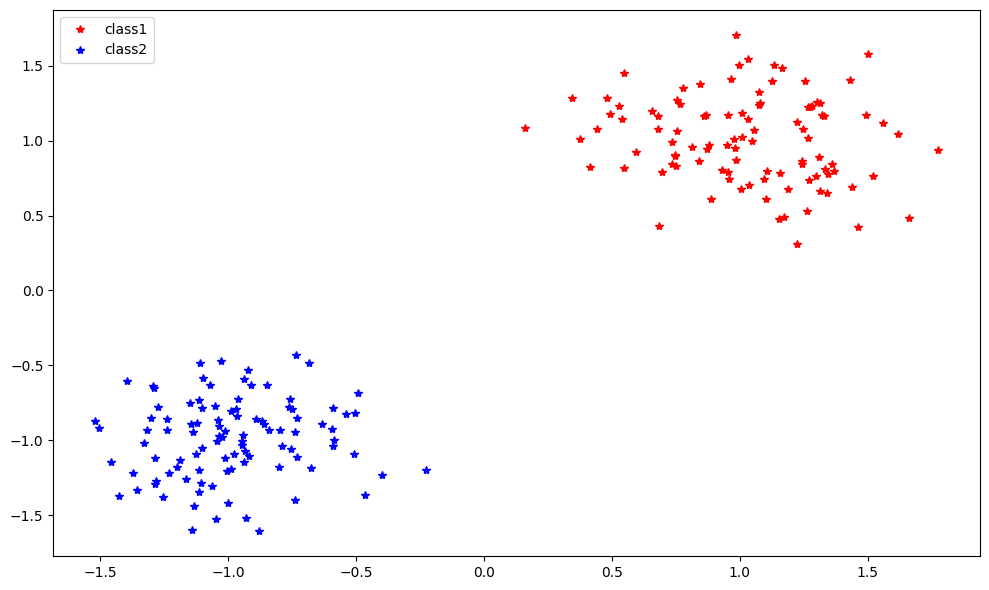

In [399]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data[:, 0], data[:, 1], 'r*')
plt.plot(data1[:, 0], data1[:, 1], 'b*')
plt.legend(["class1", "class2"], loc="upper left")
plt.show()


In [400]:
np.vstack((data, data1))[:, 0:2]


array([[ 0.8605072 ,  1.16531841],
       [ 1.66198031,  0.4843978 ],
       [ 1.07544826,  1.32559102],
       [ 1.24327496,  0.86682597],
       [ 0.99538181,  1.50492402],
       [ 1.12615074,  1.39836857],
       [ 0.52780557,  1.23481585],
       [ 1.32231124,  1.17287984],
       [ 0.94955214,  0.974347  ],
       [ 1.29629237,  0.76115877],
       [ 0.84465429,  1.38089305],
       [ 0.75282988,  1.27072786],
       [ 1.26689344,  1.22242282],
       [ 1.43210314,  1.40676742],
       [ 1.31001192,  0.88945649],
       [ 1.3326315 ,  0.80928249],
       [ 1.34371495,  0.77757229],
       [ 1.24604693,  1.07691732],
       [ 1.35932956,  0.84638713],
       [ 0.47861923,  1.28452122],
       [ 0.73502793,  0.99199679],
       [ 0.86938209,  1.17277452],
       [ 1.03316316,  1.54469864],
       [ 0.98664525,  0.87084787],
       [ 0.96540597,  1.41192692],
       [ 0.54823746,  0.81810231],
       [ 0.54538768,  1.45012974],
       [ 0.41421508,  0.82642492],
       [ 1.15178719,

In [401]:
class Adaline(object):

    def __init__(self, learn_rate=0.01, iterations=100):
        self.learn_rate = learn_rate
        self.iterations = iterations

    def fit(self, X, y, biased_X=False,):
        if not biased_X:
            X = self._add_bias(X)
        self._initial_weights(X)
        self.cost = []
        for cycle in range(self.iterations):
            # output_pred = self._activation(self._net_input(X))
            output_pred = self.predict(X, biased_X=True)
            errors = y - output_pred
            # errors = errors.reshape(1, -1)
            self.weights[0:2] += (self.learn_rate * X[:, 0:2].T.dot(errors))
            self.weights[2] += (self.learn_rate * errors).sum()
            cost = (errors**2).sum() / 2.0
            cond = self.learn_rate * (errors.reshape(1, -1).T * X)
            self.cost.append(cost)

            if np.all(cond > 0):
                return self
            else:
                continue
        return self

    def _net_input(self, X):
        return np.dot(X, self.weights)

    def predict(self, X, biased_X=False):
        if not biased_X:
            X = self._add_bias(X)
        return np.where(self._activation(self._net_input(X)) >= 0.0, 1, -1)

    def _add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        biased_X = np.hstack((bias, X))
        return biased_X

    def _initial_weights(self, X):
        random_gen = np.random.RandomState(42)
        self.weights = random_gen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        return self

    def _activation(self, X):
        return X


In [402]:
# create a perceptron classifier and train on our data
classifier = Adaline(learn_rate=0.001, iterations=100)
s = np.vstack((data, data1))[:, 0:2]
t = np.vstack((data, data1))[:, 2]
a = classifier.fit(s, t)

In [403]:
print(classifier.cost)


[296.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


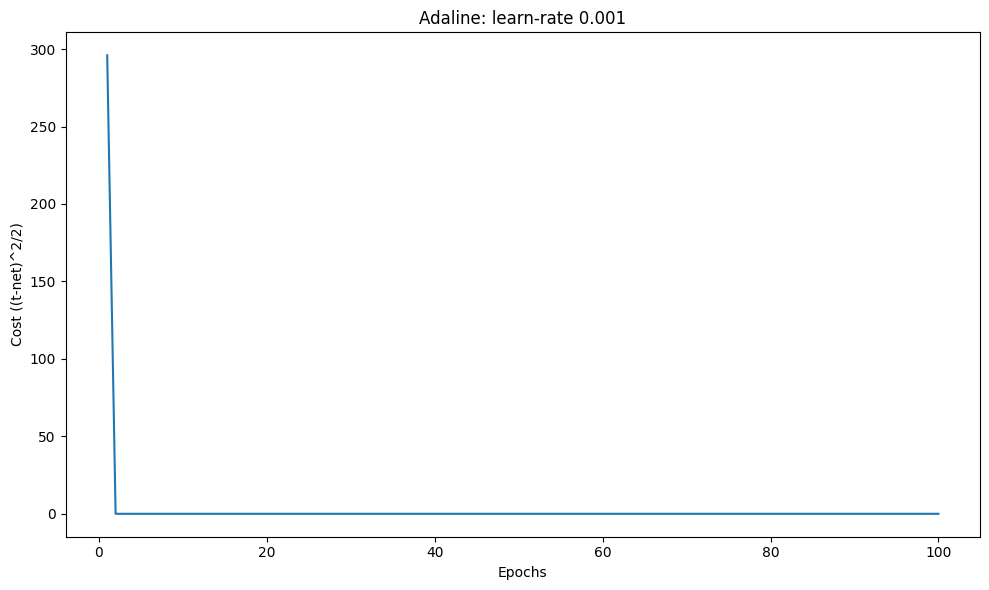

In [404]:

# plot cost after each iteration of training
plt.plot(range(1, len(classifier.cost) + 1), classifier.cost)
plt.title("Adaline: learn-rate 0.001")
plt.xlabel('Epochs')
plt.ylabel('Cost ((t-net)^2/2)')
plt.show()


In [405]:
classifier.predict(data[:, 0:2])


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [406]:
classifier.predict(data1[:, 0:2])


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [407]:
(w2, w1, b) = a.weights

print(w2, w1, b)


-0.09903285846988769 -0.2993895572193534 -0.09752311461899314


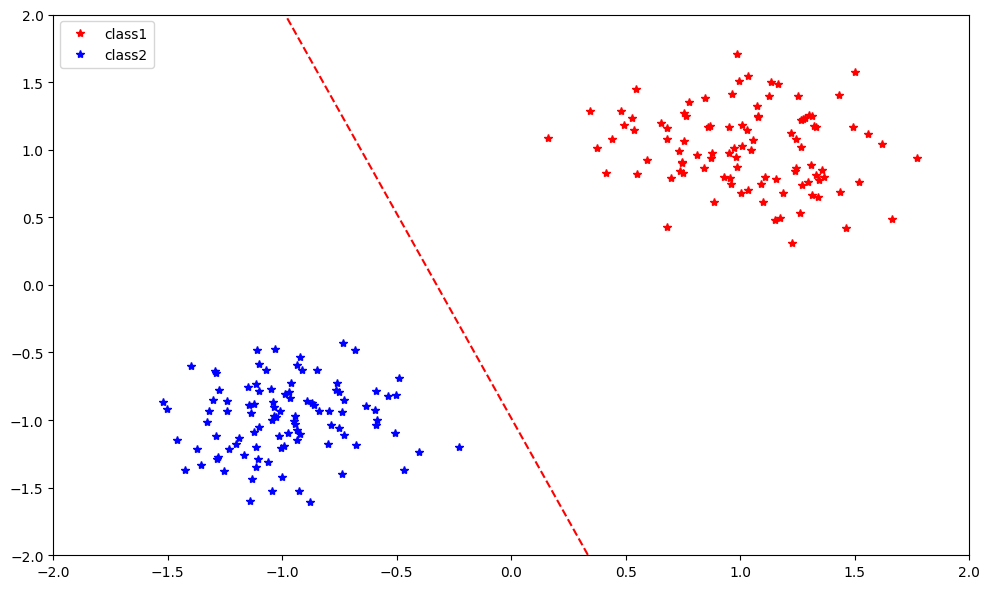

In [408]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data[:, 0], data[:, 1], 'r*')
plt.plot(data1[:, 0], data1[:, 1], 'b*')
plt.legend(["class1", "class2"], loc="upper left")
x = np.linspace(-5, 5, 100)
y = - (w1/w2) * x - b/w2
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(x, y, "--r")
plt.show()


# B

In [409]:
from numpy import random
x2 = random.normal(loc=0, scale=0.6, size=(1, 100))
y2 = random.normal(loc=0, scale=0.6, size=(1, 100))
x3 = random.normal(loc=2, scale=0.8, size=(1, 100))
y3 = random.normal(loc=2, scale=0.8, size=(1, 100))


In [410]:
data2 = np.zeros((100, 3))
for i in range(100):
    d = np.array((x2[0, i], y2[0, i], -1))
    data2[i] = d


In [411]:
data3 = np.zeros((100, 3))
for i in range(100):
    d = np.array((x3[0, i], y3[0, i], 1))
    data3[i] = d


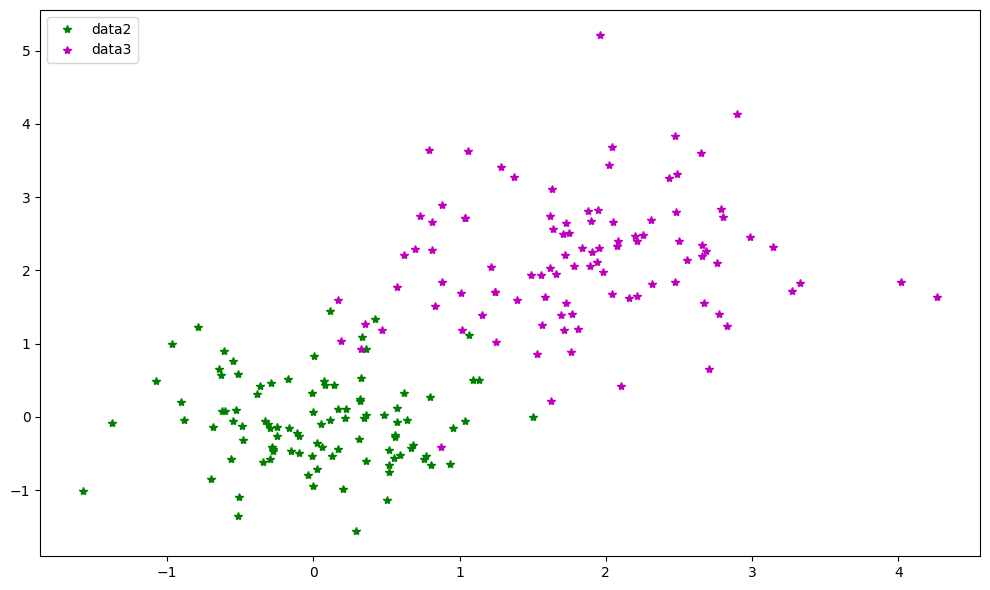

In [412]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data2[:, 0], data2[:, 1], 'g*')
plt.plot(data3[:, 0], data3[:, 1], 'm*')
plt.legend(["data2", "data3"], loc="upper left")
plt.show()


In [413]:
# create a perceptron classifier and train on our data
classifier = Adaline(learn_rate=0.001, iterations=100)
s=np.vstack((data2, data3))[:, 0:2]
t=np.vstack((data2, data3))[:, 2]
a=classifier.fit(s, t)


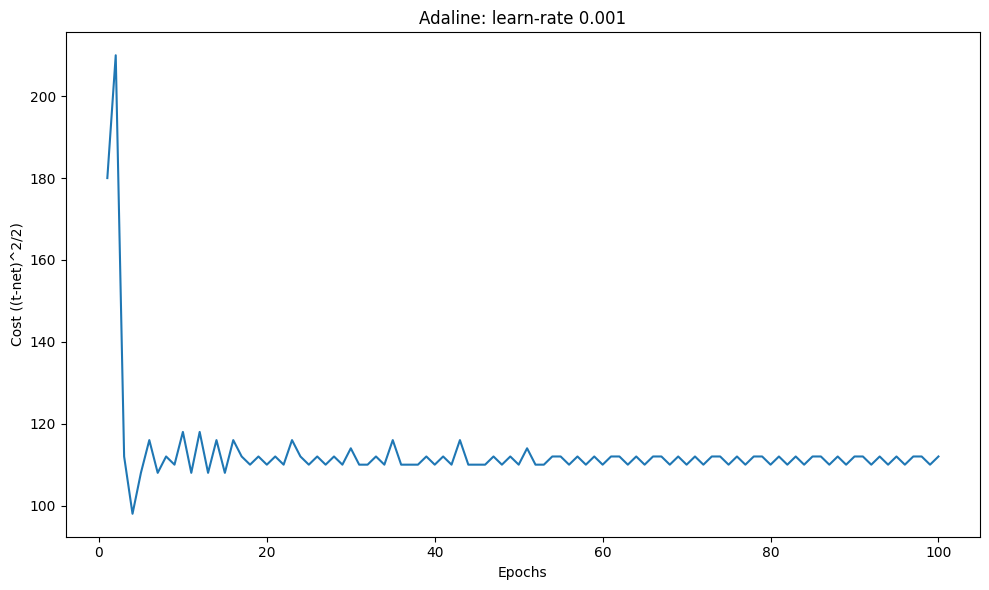

In [414]:
# print(classifier.cost)
# plot cost after each iteration of training
plt.plot(range(1, len(classifier.cost) + 1), classifier.cost)
plt.title("Adaline: learn-rate 0.001")
plt.xlabel('Epochs')
plt.ylabel('Cost ((t-net)^2/2)')
plt.show()


In [415]:
(w2, w1, b) = classifier.weights
# (b, w1, w2) = a.w_ 
# b = b1
# w12, w11 = w2
# b = b1

print(w2, w1, b)


-0.5930328584698881 1.3000387605478203 -0.5915231146189934


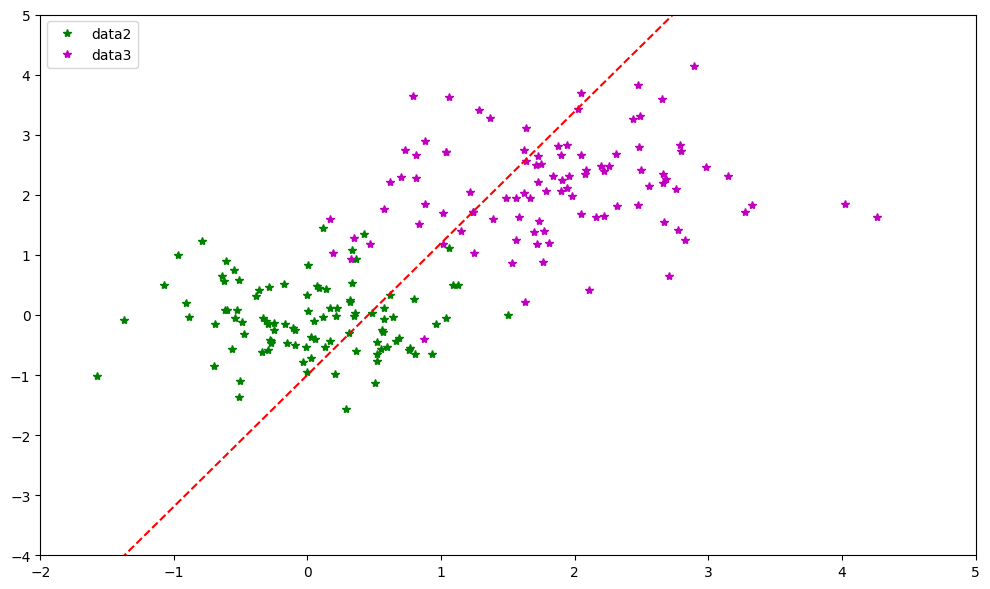

In [416]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


plt.plot(data2[:, 0], data2[:, 1], 'g*')
plt.plot(data3[:, 0], data3[:, 1], 'm*')
plt.legend(["data2", "data3"], loc="upper left")
x = np.linspace(-5, 5, 100)
plt.xlim(-2, 5)
plt.ylim(-4, 5)
y = - (w1/w2) * x - b/w2
plt.plot(x, y, "--r")
plt.show()


In [417]:
classifier.predict(data2[:, 0:2])


array([ 1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1])

In [418]:
classifier.predict(data3[:, 0:2])


array([ 1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1])